In [98]:
import umap
import matplotlib
import pandas as pd
import itertools
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib.animation import FuncAnimation

In [39]:
df_ori = pd.read_csv('pose-output.csv')
print(df_ori.head(3)['name'])
print("total name number is", len(df_ori['name'].unique()))
print("total row number is", len(df_ori))

0        Seated Jackknife
1    hanging leg raises_4
2      lat pull-downs (3)
Name: name, dtype: object
total name number is 224
total row number is 224


In [40]:
features = ['xX_left_shoulder','yY_left_shoulder','zZ_left_shoulder','xX_right_shoulder',
           'yY_right_shoulder','zZ_right_shoulder','xX_left_elbow','yY_left_elbow',
           'zZ_left_elbow','xX_right_elbow','yY_right_elbow','zZ_right_elbow',
           'xX_left_wrist','yY_left_wrist','zZ_left_wrist','xX_right_wrist','yY_right_wrist',
           'zZ_right_wrist','xX_left_hip','yY_left_hip','zZ_left_hip','xX_right_hip','yY_right_hip',
           'zZ_right_hip','xX_left_knee','yY_left_knee','zZ_left_knee','xX_right_knee','yY_right_knee',
            'zZ_right_knee','xX_left_ankle','yY_left_ankle','zZ_left_ankle','xX_right_ankle',
           'yY_right_ankle','zZ_right_ankle','left_shoulder__left_wrist','right_wrist__left_wrist',
           'left_elbow__left_wrist','right_elbow__right_wrist','left_hip__left_ankle',
           'right_hip__right_ankle','right_wrist__right_shoulder','right_knee__left_knee',
           'right_ankle__left_ankle','right_wrist__right_ankle','left_wrist__left_ankle',
           'right_wrist__right_knee','left_wrist__left_knee']
name_count = []

In [41]:
for id, row in df_ori.iterrows():
    temp = pd.DataFrame()
    name = row['name']
    for f_name in features:
        s = row[f_name]
        s = s[1:-1]
        r = s.split(',')
        res = [float(re) for re in r]
        df_ori.at[id, 'frame'] = len(res)
        df_ori.at[id, f_name] = res
print(df_ori.head(3))

                   name                                   xX_left_shoulder  \
0      Seated Jackknife  [0.5418540835380554, 0.5442179441452026, 0.542...   
1  hanging leg raises_4  [0.5782945156097412, 0.5766435265541077, 0.578...   
2    lat pull-downs (3)  [0.3666636049747467, 0.36453235149383545, 0.36...   

                                    yY_left_shoulder  \
0  [0.3002445101737976, 0.2985352575778961, 0.301...   
1  [0.26492059230804443, 0.26829394698143005, 0.2...   
2  [0.42665767669677734, 0.4232560694217682, 0.42...   

                                    zZ_left_shoulder  \
0  [-0.012251616455614567, -0.014628192409873009,...   
1  [0.23363590240478516, 0.2346416413784027, 0.17...   
2  [-0.14651350677013397, -0.13161535561084747, -...   

                                   xX_right_shoulder  \
0  [0.5088052749633789, 0.5077652931213379, 0.508...   
1  [0.3990108072757721, 0.39986276626586914, 0.39...   
2  [0.5754898190498352, 0.5769296288490295, 0.581...   

            

In [42]:
pose_name='Seated Jackknife'
pose_data=df_ori[df_ori['name']==pose_name]
print(pose_data)

               name                                   xX_left_shoulder  \
0  Seated Jackknife  [0.5418540835380554, 0.5442179441452026, 0.542...   

                                    yY_left_shoulder  \
0  [0.3002445101737976, 0.2985352575778961, 0.301...   

                                    zZ_left_shoulder  \
0  [-0.012251616455614567, -0.014628192409873009,...   

                                   xX_right_shoulder  \
0  [0.5088052749633789, 0.5077652931213379, 0.508...   

                                   yY_right_shoulder  \
0  [0.3219769299030304, 0.3233363628387451, 0.320...   

                                   zZ_right_shoulder  \
0  [-0.29006227850914, -0.3067556917667389, -0.29...   

                                       xX_left_elbow  \
0  [0.5200956463813782, 0.5252318978309631, 0.518...   

                                       yY_left_elbow  \
0  [0.43313315510749817, 0.43440017104148865, 0.4...   

                                       zZ_left_elbow  ...  \

In [43]:
pose_features = ['xX_left_shoulder', 'yY_left_shoulder', 'zZ_left_shoulder',
                 'xX_right_shoulder', 'yY_right_shoulder', 'zZ_right_shoulder',
                 'xX_left_elbow', 'yY_left_elbow', 'zZ_left_elbow', 'xX_right_elbow',
                 'yY_right_elbow', 'zZ_right_elbow', 'xX_left_wrist', 'yY_left_wrist',
                 'zZ_left_wrist', 'xX_right_wrist', 'yY_right_wrist', 'zZ_right_wrist',
                 'xX_left_hip', 'yY_left_hip', 'zZ_left_hip', 'xX_right_hip',
                 'yY_right_hip', 'zZ_right_hip', 'xX_left_knee', 'yY_left_knee',
                 'zZ_left_knee', 'xX_right_knee', 'yY_right_knee', 'zZ_right_knee',
                 'xX_left_ankle', 'yY_left_ankle', 'zZ_left_ankle', 'xX_right_ankle',
                 'yY_right_ankle', 'zZ_right_ankle']
key_dict = {}
for pose_feature in pose_features:
    pose_feature = pose_feature.replace('zZ_', '')
    pose_feature = pose_feature.replace('xX_', '')
    pose_feature = pose_feature.replace('yY_', '')
    if pose_feature not in key_dict.keys():
        key_dict[pose_feature] = {}
for key in key_dict.keys():
    key_dict[key]['x']=pose_data['xX_'+key][0]
    key_dict[key]['y']=pose_data['yY_'+key][0]
    key_dict[key]['z']=pose_data['zZ_'+key][0]
print(key_dict)

{'left_shoulder': {'x': [0.5418540835380554, 0.5442179441452026, 0.5421387553215027, 0.5420816540718079, 0.5436391234397888, 0.539828896522522, 0.5367888808250427, 0.5364277958869934, 0.5306091904640198, 0.5277541875839233, 0.5199993848800659, 0.5112655758857727, 0.5100338459014893, 0.5028608441352844, 0.5002005696296692, 0.49810805916786194, 0.49924349784851074, 0.49624985456466675, 0.49097007513046265, 0.49036020040512085, 0.4932609498500824, 0.49141964316368103, 0.48559221625328064, 0.483910471200943, 0.47910040616989136, 0.47736960649490356, 0.479134738445282, 0.49408167600631714, 0.517299234867096, 0.5216644406318665, 0.5117368698120117, 0.5062788128852844, 0.4967692494392395, 0.4735077917575836, 0.46353214979171753, 0.45960378646850586, 0.4560663104057312, 0.45557504892349243, 0.466982901096344, 0.47716182470321655, 0.4976591169834137, 0.5023148059844971, 0.5117254257202148, 0.5199955105781555, 0.5199832320213318, 0.5172215104103088, 0.5154964327812195, 0.5119391679763794, 0.5054

dict_keys(['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'])


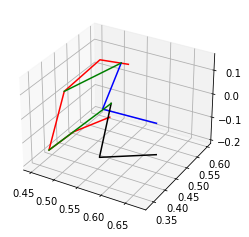

In [44]:
print(key_dict.keys())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
up_names=['left_wrist','left_elbow','left_shoulder','right_shoulder','right_elbow','right_wrist']

def update(index):
    ax.clear()
    X=[]
    Y=[]
    Z=[]
    for name in up_names:
        X.append(key_dict[name]['x'][index])
        Y.append(key_dict[name]['y'][index])
        Z.append(key_dict[name]['z'][index])
    ax.plot(X,Y,Z, c='red')
    
    left_leg_names=['left_hip','left_knee','left_ankle']
    X=[]
    Y=[]
    Z=[]
    for name in left_leg_names:
        X.append(key_dict[name]['x'][index])
        Y.append(key_dict[name]['y'][index])
        Z.append(key_dict[name]['z'][index])
    ax.plot(X,Y,Z, c='blue')
    
    right_leg_names=['right_hip','right_knee','right_ankle']
    X=[]
    Y=[]
    Z=[]
    for name in right_leg_names:
        X.append(key_dict[name]['x'][index])
        Y.append(key_dict[name]['y'][index])
        Z.append(key_dict[name]['z'][index])
    ax.plot(X,Y,Z, c='black')
    
    connect=['left_hip','left_shoulder']
    X=[]
    Y=[]
    Z=[]
    for name in connect:
        X.append(key_dict[name]['x'][index])
        Y.append(key_dict[name]['y'][index])
        Z.append(key_dict[name]['z'][index])
    ax.plot(X,Y,Z, c='green')
    
    connect=['right_hip','right_shoulder']
    X=[]
    Y=[]
    Z=[]
    for name in connect:
        X.append(key_dict[name]['x'][index])
        Y.append(key_dict[name]['y'][index])
        Z.append(key_dict[name]['z'][index])
    ax.plot(X,Y,Z, c='green')
ani = FuncAnimation(fig, update, frames=int(pose_data['frame']-1), interval=100)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [45]:
min_frame = df_ori['frame'].min()
print("min_frame", min_frame)
max_feature = len(features) * int(min_frame)
print("max feature number is", max_feature)
df = pd.DataFrame(columns=['name'] + [str(int(i)) for i in range(max_feature)])

min_frame 27.0
max feature number is 1323


In [46]:
for id, row in df_ori.iterrows():
    temp = pd.DataFrame(columns = ['name'])
    i = 0
    while i < int(max_feature):
        for feature_name in features:
            for v in row[feature_name][:int(min_frame)]:
                temp[str(i)] = [v]
                i += 1
    temp['name'] = [row['name']]
    print("process", row['name'] + "video")
    df = df.append(temp)
print(df)

process Seated Jackknifevideo
process hanging leg raises_4video
process lat pull-downs (3)video
process The Deadliftvideo
process seated rows (4)video
process yt1s.com - Incline Bench Sit ups_480pvideo
process Crunches - Tutorial Tuesdayvideo
process deadlifts (1)video
process hanging leg raises_7video
process bench pressesvideo
process How I Like To Curl A Barbell - Comfortable & Effectivevideo
process Low Pulley Cable Crossovervideo
process bench presses (5)video
process Low Pulley Cable Crossover_3video
process Low Pulley Cable Crossovers!video
process bench presses (3)video
process EZ Bar Preacher Curlsvideo
process preacher curls (2)video
process Low Pulley Cable Crossoversvideo
process Low-Pulley Cable Crossovervideo
process seated calf raises (1)video
process barbel curl (1)video
process Barbell Curlsvideo
process preacher curls (1)video
process yt1s.com - Low Pulley Cable Crossover_360pvideo
process dumbbell pressesvideo
process bent over row (2)video
process barbel curl (2)vid

process Rope Push Downs- Supinatedvideo
process Tricep Kickbacks 2video
process Triceps Kickbacksvideo
process 1 arm dumbbell triceps extensionvideo
                                                 name         0         1  \
0                                    Seated Jackknife  0.541854  0.544218   
0                                hanging leg raises_4  0.578295  0.576644   
0                                  lat pull-downs (3)  0.366664  0.364532   
0                                        The Deadlift  0.740611  0.741997   
0                                     seated rows (4)  0.513579  0.504993   
..                                                ...       ...       ...   
0   standing cable push downs triceps workout (abo...  0.388496  0.387145   
0                          Rope Push Downs- Supinated  0.460846  0.461796   
0                                  Tricep Kickbacks 2  0.627720  0.632743   
0                                   Triceps Kickbacks  0.264051  0.271203   
0   

In [47]:
x = df.loc[:, [str(int(i)) for i in range(max_feature)]].values
y = df.loc[:, ['name']].values

In [54]:
#PCA
n_components = 2
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents
                           , columns=['principal component ' + str(i + 1) for i in range(n_components)])
principalDf.index = df.index
principalDf['name'] = df['name'].copy()
print(principalDf.head(3))

   principal component 1  principal component 2                  name
0              -3.463664               0.407773      Seated Jackknife
0              -1.821311               1.034820  hanging leg raises_4
0               5.596676              -1.143324    lat pull-downs (3)


In [73]:
#t-SNE
from sklearn.manifold import TSNE
n_components=2
X_embedded = TSNE(n_components=n_components).fit_transform(x)
TSNETDf = pd.DataFrame(data=X_embedded
                           , columns=['TSNE component ' + str(i + 1) for i in range(n_components)])
TSNETDf.index = df.index
TSNETDf['name'] = df['name'].copy()
print(TSNETDf.head(3))

   TSNE component 1  TSNE component 2                  name
0         -4.607374         -2.089208      Seated Jackknife
0         -1.292924         -8.286202  hanging leg raises_4
0         10.746886         10.071148    lat pull-downs (3)


In [86]:
#umap
n_components=2
embedding = umap.UMAP(n_components=n_components,
                      min_dist=0.3,
                      metric='correlation').fit_transform(x)
umapDf = pd.DataFrame(data=embedding
                           , columns=['umap component ' + str(i + 1) for i in range(n_components)])
umapDf.index = df.index
umapDf['name'] = df['name'].copy()
print(umapDf.head(3))

   umap component 1  umap component 2                  name
0          7.091772          7.779628      Seated Jackknife
0          7.993401          4.545179  hanging leg raises_4
0         12.516149          3.725663    lat pull-downs (3)


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

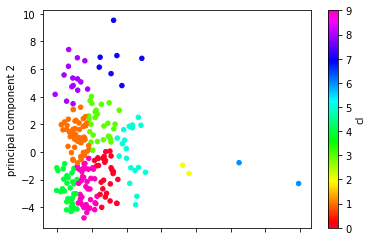

In [92]:
#Partitional clustering
#PCA & Kmeans
pca_x = principalDf.loc[:, ['principal component ' + str(i + 1) for i in range(n_components)]].values
kmeans = KMeans(n_clusters=10, random_state=0).fit(pca_x)
principalDf['cl'] = kmeans.labels_
principalDf.plot.scatter('principal component 1', 'principal component 2', c='cl', colormap='gist_rainbow')

<AxesSubplot:xlabel='TSNE component 1', ylabel='TSNE component 2'>

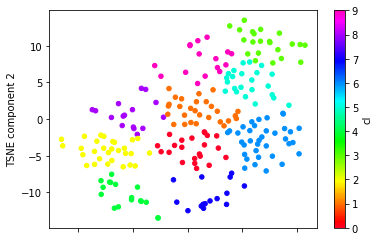

In [93]:
#t-SNE & Kmeans
TSNE_x = TSNETDf.loc[:, ['TSNE component ' + str(i + 1) for i in range(n_components)]].values
kmeans = KMeans(n_clusters=10, random_state=0).fit(TSNE_x)
TSNETDf['cl'] = kmeans.labels_
TSNETDf.plot.scatter('TSNE component 1', 'TSNE component 2', c='cl', colormap='gist_rainbow')

<AxesSubplot:xlabel='umap component 1', ylabel='umap component 2'>

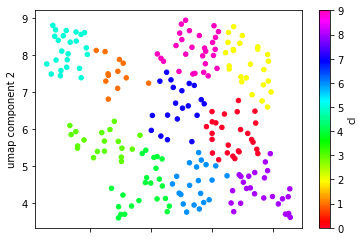

In [94]:
#umap & Kmeans
umap_x = umapDf.loc[:, ['umap component ' + str(i + 1) for i in range(n_components)]].values
kmeans = KMeans(n_clusters=10, random_state=0).fit(umap_x)
umapDf['cl'] = kmeans.labels_
umapDf.plot.scatter('umap component 1', 'umap component 2', c='cl', colormap='gist_rainbow')

<AxesSubplot:xlabel='umap component 1', ylabel='umap component 2'>

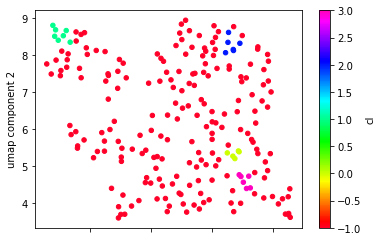

In [91]:
#Density-based clustering
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.3)
dbscan.fit(umap_x)
umapDf['cl'] = dbscan.labels_
umapDf.plot.scatter('umap component 1','umap component 2', c = 'cl', colormap = 'gist_rainbow')

<AxesSubplot:xlabel='umap component 1', ylabel='umap component 2'>

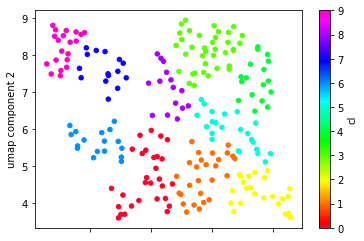

In [96]:
#Hierarchical Clustering 
#Birch
from sklearn.cluster import Birch
brc = Birch(n_clusters=10)
brc.fit(umap_x)
umapDf["cl"] = brc.predict(umap_x)
umapDf.plot.scatter('umap component 1', 'umap component 2', c = 'cl', colormap = 'gist_rainbow')

<AxesSubplot:xlabel='umap component 1', ylabel='umap component 2'>

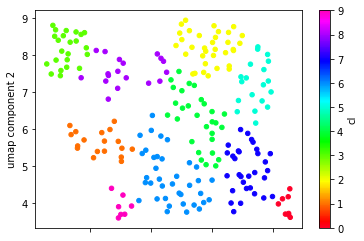

In [101]:
#Soft Clustering
#GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10).fit(umap_x)
labels = gmm.predict(umap_x)
umapDf['cl'] = labels
umapDf.plot.scatter('umap component 1', 'umap component 2', c='cl', colormap='gist_rainbow')